In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


# Paths
path = '/pscratch/sd/k/knaidoo/ACM/MockChallenge/Outputs/'

# Choose smoothing scale
sigmaJ = 10. # or 5. Mpc/h
# Choose stats to include
whichstats = 'dlbs' # or 'lb', 'd', 'l', 'b' or 's'

if sigmaJ == 5.:
    sigmaJ_str = '5p0'
elif sigmaJ == 10.:
    sigmaJ_str = '10p0'

# load covariance realisation indices for covariance
data = np.load(path + 'covariance_ngals.npz')
ind_cov = data['h_ind']
cond = np.where(data['ngals'] != 0)[0]
ind_cov = ind_cov[cond]

# load emulator indices
data = np.load(path + 'emulator_ngals.npz')
a_ind = data['a_ind'] # abacussummit indices
h_ind = data['h_ind'] # HOD indices

# loading covariance mocks
vecs = []
for i in ind_cov:
    data = np.load(path + 'covariance_mocks_%i_%s.npz' % (i, sigmaJ_str))
    xd = data['xd'] # x-axis for d (degree)
    yd = data['yd'] # y-axis histogram for d (degree)
    xl = data['xl'] # x-axis for l (edge length Mpc/h)
    yl = data['yl'] # y-axis histogram for l (edge length Mpc/h)
    xb = data['xb'] # x-axis for b (branch length Mpc/h)
    yb = data['yb'] # y-axis histogram for b (branch length Mpc/h)
    xs = data['xs'] # x-axis for s (branch shape)
    ys = data['ys'] # y-axis histogram for s (branch shape)
    
    if whichstats == 'd':
        vec = yd
    elif whichstats == 'l':
        vec = yl
    elif whichstats == 'b':
        vec = yb
    elif whichstats == 's':
        vec = ys
    elif whichstats == 'lb':
        vec = np.concatenate([yl,yb])
    elif whichstats == 'dlbs':
        vec = np.concatenate([yd,yl,yb,ys])

    vecs.append(vec)

vecs = np.array(vecs)

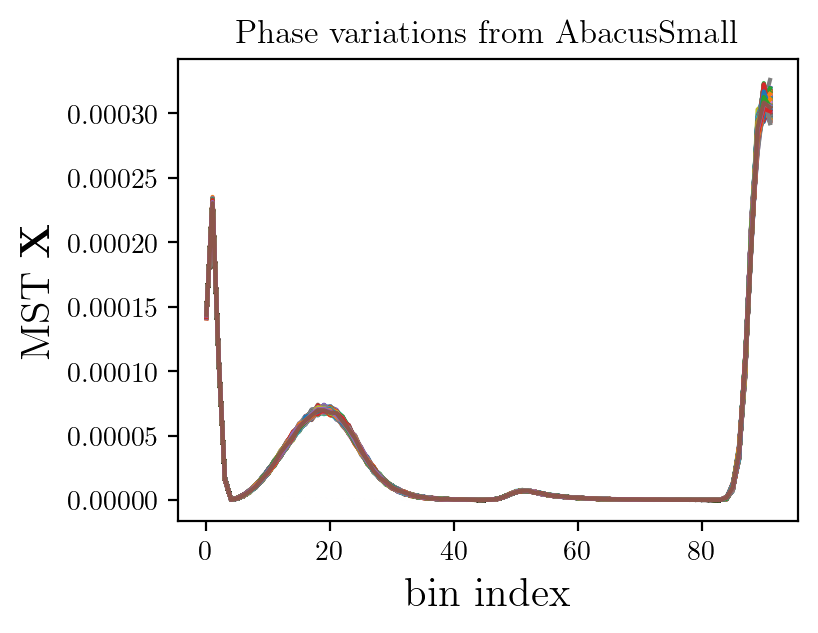

In [26]:
fig, ax = plt.subplots(figsize=(4, 3))

for i in range(len(vecs)):
    ax.plot(vecs[i])

ax.set_xlabel(r'$\textrm{bin index}$', fontsize=15)
ax.set_ylabel(r'$\textrm{MST } \mathbf{X}$', fontsize=15)
ax.set_title('Phase variations from AbacusSmall')
plt.show()

In [20]:
# loading emulator data vectors

vecs_emu = []
for i in range(0, len(a_ind)):
    data = np.load(path + 'emulator_%i_hod_%i_smooth_%s.npz' % (a_ind[i], h_ind[i], sigmaJ_str))
    xd = data['xd'] # x-axis for d (degree)
    yd = data['yd'] # y-axis histogram for d (degree)
    xl = data['xl'] # x-axis for l (edge length Mpc/h)
    yl = data['yl'] # y-axis histogram for l (edge length Mpc/h)
    xb = data['xb'] # x-axis for b (branch length Mpc/h)
    yb = data['yb'] # y-axis histogram for b (branch length Mpc/h)
    xs = data['xs'] # x-axis for s (branch shape)
    ys = data['ys'] # y-axis histogram for s (branch shape)
    
    if whichstats == 'd':
        vec = yd
    elif whichstats == 'l':
        vec = yl
    elif whichstats == 'b':
        vec = yb
    elif whichstats == 's':
        vec = ys
    elif whichstats == 'lb':
        vec = np.concatenate([yl,yb])
    elif whichstats == 'dlbs':
        vec = np.concatenate([yd,yl,yb,ys])
    
    vecs_emu.append(vec)

vecs_emu = np.array(vecs_emu)

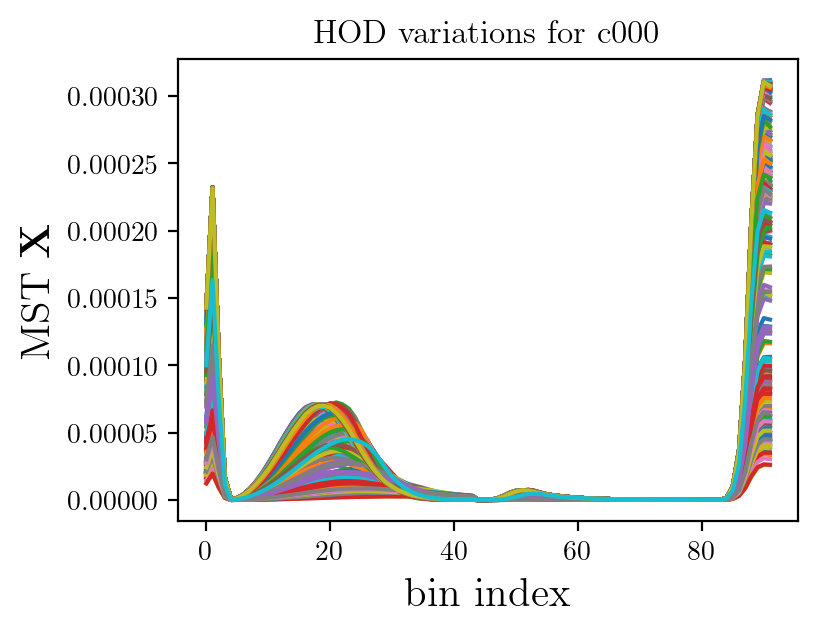

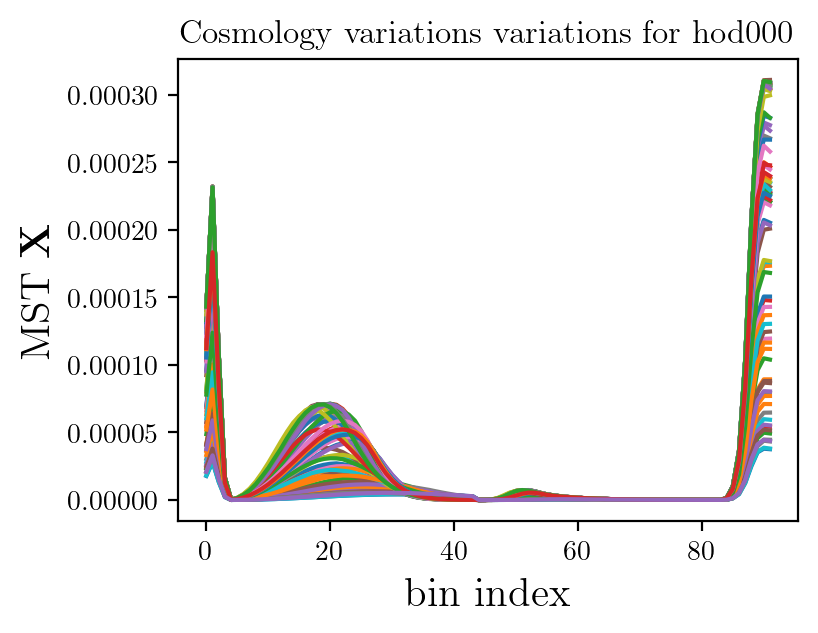

In [30]:
fig, ax = plt.subplots(figsize=(4, 3))
for i in range(350):
    ax.plot(vecs_emu[i])
ax.set_xlabel(r'$\textrm{bin index}$', fontsize=15)
ax.set_ylabel(r'$\textrm{MST } \mathbf{X}$', fontsize=15)
ax.set_title('HOD variations for c000')
plt.show()

fig, ax = plt.subplots(figsize=(4, 3))
for i in range(len(vecs_emu)):
    if i % 350 == 0:
        ax.plot(vecs_emu[i])
ax.set_xlabel(r'$\textrm{bin index}$', fontsize=15)
ax.set_ylabel(r'$\textrm{MST } \mathbf{X}$', fontsize=15)
ax.set_title('Cosmology variations variations for hod000')
plt.show()

In [37]:
np.arange(92).shape

(92,)